<h1>Objective</h1>

Quantify and rank the factors that impact passenger satisfaction. 


Come  up with data-backed proposals through which the airline industry can increase their customer satisfaction. <br/>

In order to do this, I will attempt to understand/showcase the data; link customer satisfaction to remaining survey features through various models; and investigate impacts of features in order to suggest proposals and possible experiments for customer satisfaction improvement.


In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Description</h1>

Below is the Data Description from Kaggle <br/>
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
<br/>

<h2>Context</h2>

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?
<br/>


<h2>Content</h2>



|Variable | Description |
| :------ | :---------- |
|Gender |Gender of the passengers (Female, Male)|
|Customer |Type The customer type (Loyal customer, disloyal customer)|
|Age|The actual age of the passengers|
|Type of Travel |Purpose of the flight of the passengers (Personal Travel, Business Travel)|
|Class| Travel class in the plane of the passengers (Business, Eco, Eco Plus)|
|Flight distance| The flight distance of this journey|
|Inflight wifi service| Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)|
|Departure/Arrival time convenient| Satisfaction level of Departure/Arrival time convenient|
|Ease of Online booking| Satisfaction level of online booking|
|Gate location| Satisfaction level of Gate location|
|Food and drink| Satisfaction level of Food and drink|
|Online boarding| Satisfaction level of online boarding|
|Seat comfort| Satisfaction level of Seat comfort|
|Inflight entertainment| Satisfaction level of inflight entertainment|
|On-board service| Satisfaction level of On-board service|
|Leg room service| Satisfaction level of Leg room service|
|Baggage handling|Satisfaction level of baggage handling|
|Check-in service| Satisfaction level of Check-in service|
|Inflight service| Satisfaction level of inflight service|
|Cleanliness| Satisfaction level of Cleanliness|
|Departure Delay in Minutes| Minutes delayed when departure|
|Arrival Delay in Minutes| Minutes delayed when Arrival|
|Satisfaction| Airline satisfaction level(Satisfaction, neutral or dissatisfaction)|


<h2>Source</h2>


Dataset modified from the following dataset which itself doesn't lead to an ultimate source: <br/> https://www.kaggle.com/johndddddd/customer-satisfaction



<h2>Exploratory Data Analysis</h2>


<h4>Import Test and Train Data</h4>

In [2]:
train_data = pd.read_csv("data/raw/train.csv")
test_data = pd.read_csv("data/raw/test.csv")
train_data.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

From what we can see, the data contains both Continuous and Categorical variables. Categorical variables are either ordinal&numerical (survey responses except satisfaction), ordinal&string (satisfaction) or strings (mostly passenger particulars) [Unnamed: 0 and id seem identification related - removed next]

Now, let's explore these variables:

In [3]:
train_data.drop(labels=['Unnamed: 0', 'id'], axis=1,  inplace=True)
test_data.drop(labels=['Unnamed: 0', 'id'], axis=1,  inplace=True)

vars_cont = ['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']

vars_cat_num = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

vars_cat_str = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

<h4>Explore Continuous Variables</h4>

-Create a brief description of variables for outliers<br/>
-Observe the histogram

                 Age  Flight Distance  Arrival Delay in Minutes  \
count  103904.000000    103904.000000             103594.000000   
mean       39.379706      1189.448375                 15.178678   
std        15.114964       997.147281                 38.698682   
min         7.000000        31.000000                  0.000000   
25%        27.000000       414.000000                  0.000000   
50%        40.000000       843.000000                  0.000000   
75%        51.000000      1743.000000                 13.000000   
max        85.000000      4983.000000               1584.000000   

       Departure Delay in Minutes  
count               103904.000000  
mean                    14.815618  
std                     38.230901  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                     12.000000  
max                   1592.000000  


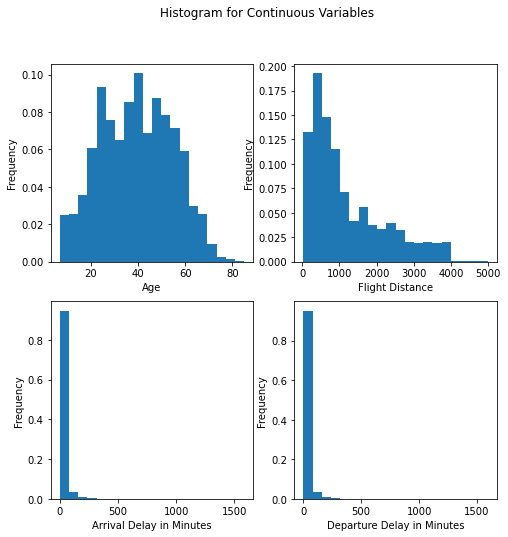

In [4]:
print(train_data[vars_cont].describe())

fig, ax = plt.subplots((len(vars_cont)+1)//2,2)
for _i, _v in enumerate(vars_cont):
    ax[_i//2, _i%2].hist(train_data[_v], weights=np.ones_like(train_data[_v])/train_data[_v].size,  bins=20)
    ax[_i//2, _i%2].set_xlabel(_v)
    ax[_i//2, _i%2].set_ylabel('Frequency')
fig.suptitle('Histogram for Continuous Variables')
fig.set_figwidth(8)
fig.set_figheight(8)

Couple Notes on the above distributions: <br/> 
i)  Departure and Arrival distributions seem to have most of their mass at or around zero, however tend to also have large outliers. We might want to keep this in mind in the future. We could try to come up with a feature that normalizes them. <br/>
ii) Flight distance could indicate generally two types of flights - short distance (<900 miles?) and long-distance (≥900?)

<h4>Explore Categorical Numerical Variables</h4>

-Create a brief description of variables for distribution.<br/>
-Note distribution and extent of zeros (data source indicates, question was either not answered or service was not available)<br/>
-Create a histogram to observe pairwise relationship.



Describe
       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000   

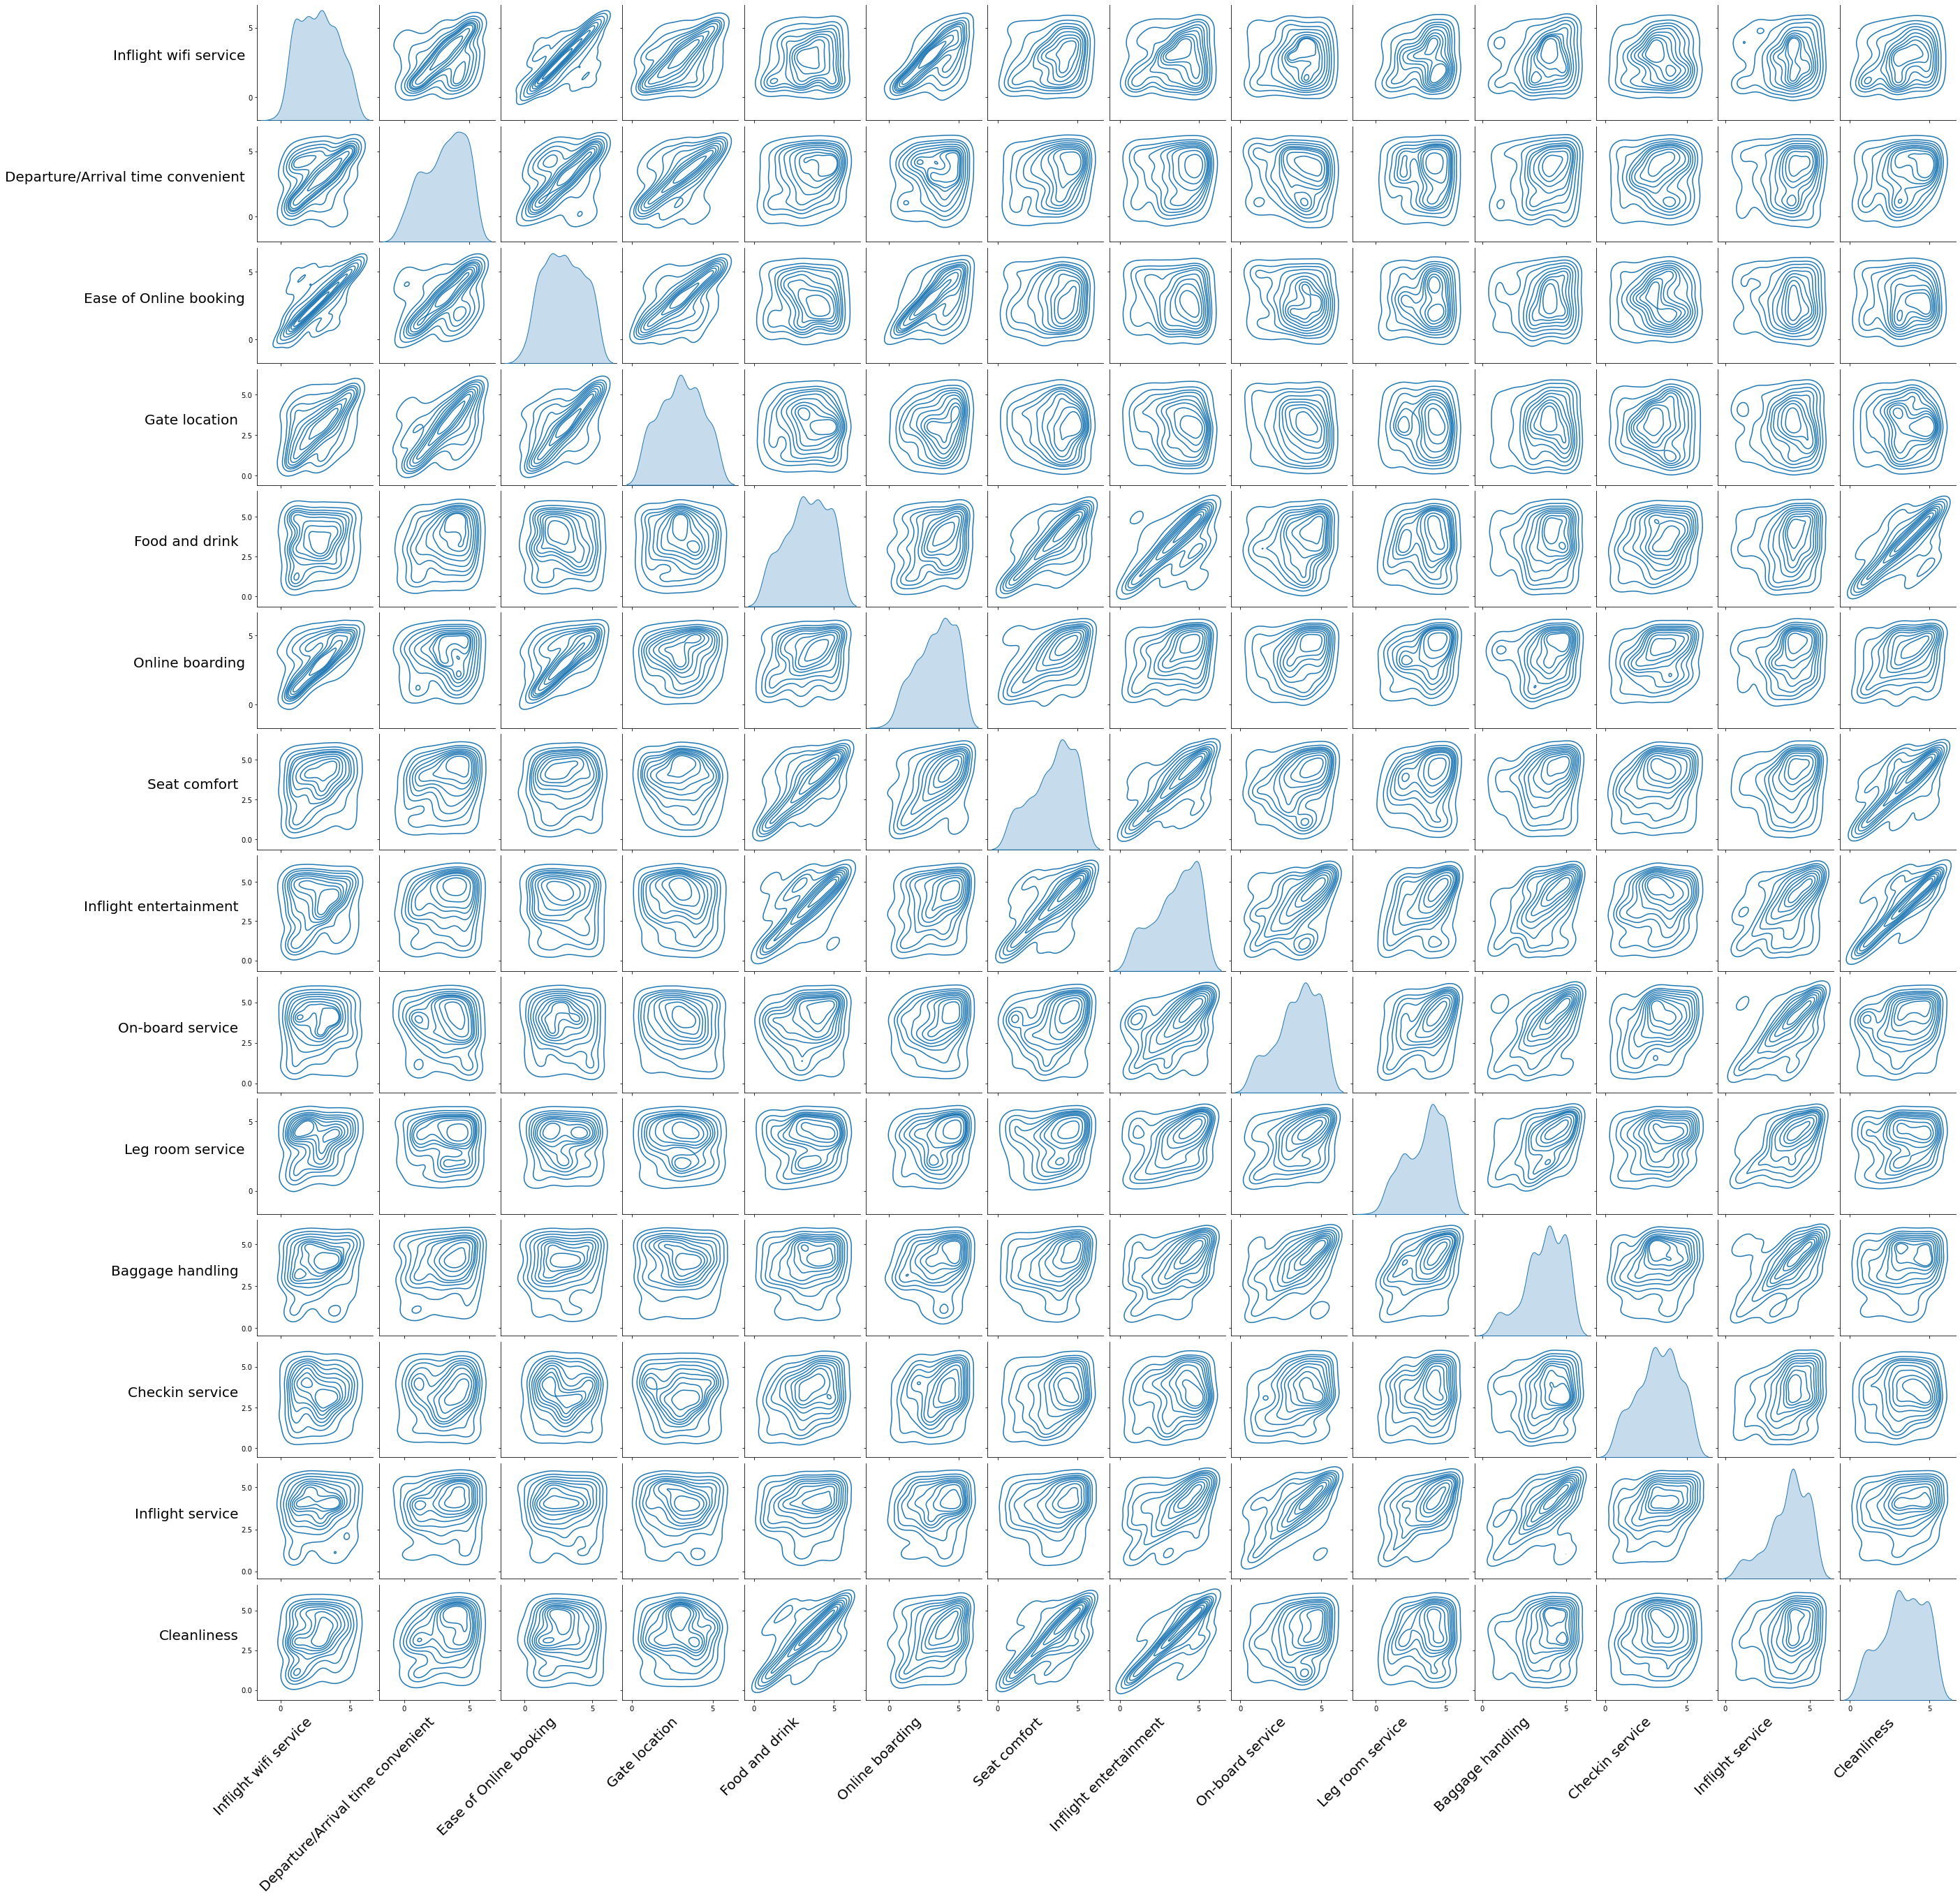

In [5]:
print('Describe\n{0}\n'.format(train_data[vars_cat_num].describe()))

_cnt_cat_df = pd.DataFrame(index=[0,1,2,3,4,5])
for _ in vars_cat_num:
    a = train_data[_].value_counts()
    _cnt_cat_df[_] = a

    
print('Values Counts:\n{0}\n'.format(_cnt_cat_df)) 
_ = train_data[vars_cat_num] == 0
print('Number of Samples with any O\'s: {0:d} out of {1:d}\n'.format(_.any(axis=1).sum(), len(_)))
del _


_ = sns.pairplot(train_data[vars_cat_num].sample(200), kind='kde')
fig.set_figwidth(20)
fig.set_figheight(20)
for _ax in _.axes.flatten():
    _ax.set_xlabel(_ax.get_xlabel(), rotation = 45, fontsize = 20)
    _ax.set_ylabel(_ax.get_ylabel(), rotation = 0, fontsize = 20)
    _ax.xaxis.get_label().set_horizontalalignment('right')
    _ax.yaxis.get_label().set_horizontalalignment('right')
sns.set_context('poster')

Couple Notes on the above Distributions: <br/> 
i)   Most distributions look unimodal a mean above 3 (the mean of uniform excluding 0's.) This may bring up questions as to whether or not there might be enough room to be able to measure improvements in services. <br/>
ii)  Bimodal distributions generally indicate there are two different populations (examples here: Food & Drink, Ease of Online Booking) and could disappear when looked from a different population conditioning (e.g. Class, Age) These in turn can help indicate pockets of demographics where impacts of an improvement could be higher. <br/>
iii) The total number of samples with any zeros (pointing to either non-answered questions or unavailable services) is around 8%. (An analysis could be done to see whether this data was relatively similar to the remaining data)



<h4>Explore Categorical String Variables - i</h4>
-Describe data


In [6]:
df_cat_cnts = train_data[vars_cat_str].value_counts().reset_index().sort_values(by=['satisfaction', 'Class', 'Type of Travel', 'Gender', 'Customer Type'])

df_cat_cnts.rename(columns = {0:'Group Count'}, inplace=True)

print("String Variable Categories ({0:d}) and Count".format(df_cat_cnts.shape[0]))
df_cat_cnts

String Variable Categories (43) and Count


Gender      Customer Type   Type of Travel     Class  \
5   Female     Loyal Customer  Business travel  Business   
10  Female  disloyal Customer  Business travel  Business   
6     Male     Loyal Customer  Business travel  Business   
13    Male  disloyal Customer  Business travel  Business   
21  Female     Loyal Customer  Personal Travel  Business   
40  Female  disloyal Customer  Personal Travel  Business   
20    Male     Loyal Customer  Personal Travel  Business   
41    Male  disloyal Customer  Personal Travel  Business   
9   Female     Loyal Customer  Business travel       Eco   
4   Female  disloyal Customer  Business travel       Eco   
8     Male     Loyal Customer  Business travel       Eco   
7     Male  disloyal Customer  Business travel       Eco   
2   Female     Loyal Customer  Personal Travel       Eco   
34  Female  disloyal Customer  Personal Travel       Eco   
3     Male     Loyal Customer  Personal Travel       Eco   
35    Male  disloyal Customer  Personal Travel       Eco   
23  Female     Loyal Customer  Business travel  Eco Plus   
28  Female  disloyal Customer  Business travel  Eco Plus   
22    Male     Loyal Customer  Business travel  Eco Plus   
31    Male  disloyal Customer  Business travel  Eco Plus   
14  Female     Loyal Customer  Personal Travel  Eco Plus   
15    Male     Loyal Customer  Personal Travel  Eco Plus   
42    Male  disloyal Customer  Personal Travel  Eco Plus   
1   Female     Loyal Customer  Business travel  Business   
16  Female  disloyal Customer  Business travel  Business   
0     Male     Loyal Customer  Business travel  Business   
17    Male  disloyal Customer  Business travel  Business   
33  Female     Loyal Customer  Personal Travel  Business   
32    Male     Loyal Customer  Personal Travel  Business   
12  Female     Loyal Customer  Business travel       Eco   
24  Female  disloyal Customer  Business travel       Eco   
11    Male     Loyal Customer  Business travel       Eco   
27    Male  disloyal Customer  Business travel       Eco   
18  Female     Loyal Customer  Personal Travel       Eco   
37  Female  disloyal Customer  Personal Travel       Eco   
19    Male     Loyal Customer  Personal Travel       Eco   
38    Male  disloyal Customer  Personal Travel       Eco   
26  Female     Loyal Customer  Business travel  Eco Plus   
36  Female  disloyal Customer  Business travel  Eco Plus   
25    Male     Loyal Customer  Business travel  Eco Plus   
39    Male  disloyal Customer  Business travel  Eco Plus   
29  Female     Loyal Customer  Personal Travel  Eco Plus   
30    Male     Loyal Customer  Personal Travel  Eco Plus   

               satisfaction  Group Count  
5   neutral or dissatisfied         4449  
10  neutral or dissatisfied         2316  
6   neutral or dissatisfied         4407  
13  neutral or dissatisfied         2120  
21  neutral or dissatisfied          938  
40  neutral or dissatisfied            7  
20  neutral or dissatisfied          944  
41  neutral or dissatisfied            4  
9   neutral or dissatisfied         2497  
4   neutral or dissatisfied         5042  
8   neutral or dissatisfied         2500  
7   neutral or dissatisfied         4218  
2   neutral or dissatisfied        11867  
34  neutral or dissatisfied           65  
3   neutral or dissatisfied        11797  
35  neutral or dissatisfied           58  
23  neutral or dissatisfied          832  
28  neutral or dissatisfied          517  
22  neutral or dissatisfied          873  
31  neutral or dissatisfied          138  
14  neutral or dissatisfied         1663  
15  neutral or dissatisfied         1623  
42  neutral or dissatisfied            4  
1                 satisfied        15598  
16                satisfied         1489  
0                 satisfied        15709  
17                satisfied         1420  
33                satisfied          130  
32                satisfied          134  
12                satisfied         2241  
24                satisfied   

Couple observations from above: 

1) Each categorical string variable seems to have a small number of categories: 3 for Class and 2 each for the remaining 4. 
2) A closer look at the data shows that there should be 48 separate categorical groups by population categories: 3^1*2^4=48. Yet, there are 43 rows. 

Missing categories are as follows (figured out elsewhere): It might be useful to have this information for analysis in the future. It might also be good to come up with count estimates of missing values to see the extent of missed elements in the sample.

| Gender     |Customer Type   | Type of Travel |  Class         |  satisfaction  | Count Group |
| :----------|:---------------|:---------------|:---------------|:--------------- |-----:|
|Female|disloyal Customer|Personal Travel|Business|satisfied|?|
|Female|disloyal Customer|Personal Travel|Eco Plus|neutral or dissatisfied|?|
|Female|disloyal Customer|Personal Travel|Eco Plus|satisfied|?|
|Male|disloyal Customer|Personal Travel|Business|satisfied|?|
|Male|disloyal Customer|Personal Travel|Eco Plus|satisfied|?|

**Explore Categorical String Variables - ii**<br/>
ii)    Frequency Breakdown<br/>


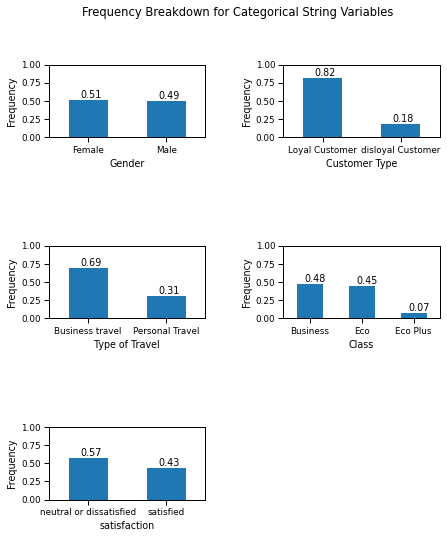

In [12]:

fig, ax = plt.subplots((len(vars_cat_str)+1)//2,2)
for _i, _v in enumerate(vars_cat_str):
    _ax = ax[_i//2, _i%2]
    _train_col = train_data[[_v]].value_counts()/len(train_data.index)
    _train_col.plot(kind='bar', ax = _ax)
    _ax.set_xticklabels(labels=[n[0] for n in _train_col.index], rotation = 0)
    _ax.set_ylim([0,1])
    _ax.set_ylabel('Frequency')
    for idx, val in enumerate(_train_col):
        _ax.text(idx-0.1, val+0.03, '{0:.2f}'.format(val))
ax[-1, -1].axis('off')
    
fig.suptitle('Frequency Breakdown for Categorical String Variables')
fig.subplots_adjust(wspace=0.5, hspace=1.5)
fig.set_figwidth(7)
fig.set_figheight(8)
sns.set_context('paper')

Given the above, we gain an understanding of the relative frequencies of passenger particulars: more 'Loyal Customers' than 'disloyal', more 'Business Travel' than 'Personal', etc.<br/><br/>
We also understand that our target variable, 'satisfaction' is more similar to a balanced sample, than not. 

Next, we save our data and move to the Data Wrangling portion. <br/>
There we will work on mapping the string data into a more convenient format (numerical) and handle NaN-like values. <br/>
<br/>
Before that, we save the variables for use in the next step.

In [8]:
pd.to_pickle(train_data, 'data/model/train_data.pkl')
pd.to_pickle(test_data, 'data/model/test_data.pkl')